### *** 1.2: ELEMENTS OF LINEAR ALGEBRA**

###*Key Concepts*


*   1.2.1: Linear Spaces
*   1.2.2: Orthogonality
*   1.2.3: Gram–Schmidt process
*   1.2.4: Eigenvalues and Eigenvectors






Master Problem



###*1.2.1: Linear Spaces*

A linear space (or vector space) is a set of vectors that can be added together and multiplied by scalars to produce another vector within the same set.

The operations of vector addition and scalar multiplication must satisfy eight axioms, which include closure under addition and scalar multiplication, associativity, distributivity, and the existence of an additive identity and additive inverses.



In [5]:
# Importing necessary libraries
import numpy as np

# Define two vectors in R^2
v1 = np.array([1, 2])
v2 = np.array([3, 5])

# Demonstrating vector addition
v_sum = v1 + v2
print(f"v1: {v1}")
print(f"v2: {v2}")
print(f"v1 + v2 = {v_sum}")

# Demonstrating scalar multiplication
scalar = 2
v_scaled = scalar * v1
print(f"Scalar multiplication of v1 by {scalar}: {v_scaled}")


v1: [1 2]
v2: [3 5]
v1 + v2 = [4 7]
Scalar multiplication of v1 by 2: [2 4]


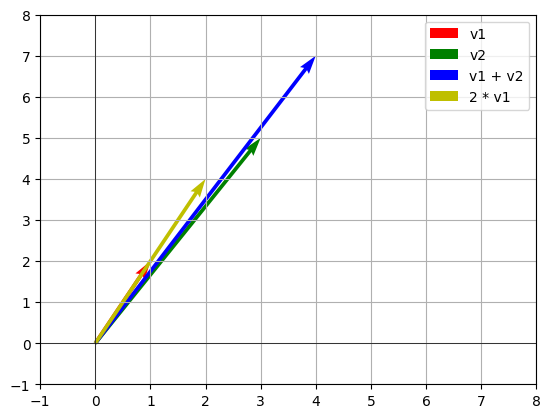

In [6]:
# Visualization of linear space for above example

plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='g', label='v2')
plt.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, color='b', label='v1 + v2')
plt.quiver(0, 0, v_scaled[0], v_scaled[1], angles='xy', scale_units='xy', scale=1, color='y', label='2 * v1')

plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


Data Points:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]]


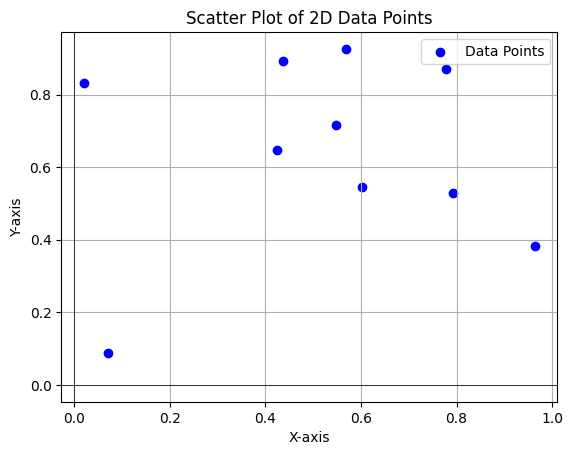

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a set of random 2D points
np.random.seed(0)  # For reproducibility
data_points = np.random.rand(10, 2)  # 10 points in 2D

# Print the generated data points
print("Data Points:\n", data_points)

# Plot the data points to visualize the linear space they represent
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Scatter Plot of 2D Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.show()


###*1.2.2: Orthogonality*

Orthogonality is a fundamental concept in vector spaces where two vectors are said to be orthogonal if their dot product is zero. This means that the vectors are perpendicular to each other in the geometric sense.



In [7]:
# Define orthogonal vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# Compute the dot product to verify orthogonality
dot_product = np.dot(v1, v2)
print(f"Dot product of v1 and v2: {dot_product}")


Dot product of v1 and v2: 0


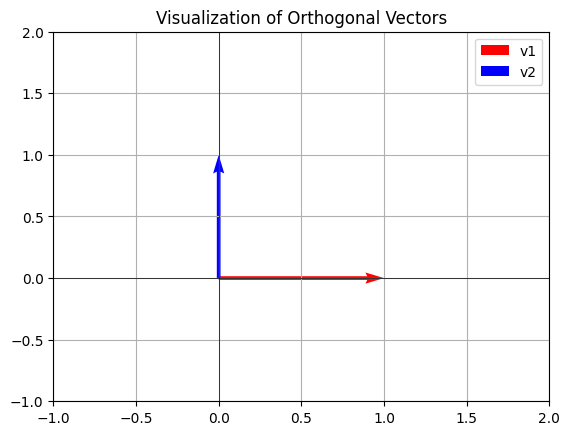

In [8]:
# Visualization of orthogonal vectors
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Visualization of Orthogonal Vectors')
plt.show()


In [17]:
# Check orthogonality between two vectors

# Selecting two vectors from the data points
v1 = data_points[1]  # First vector
v2 = data_points[2]  # Second vector

# Calculate the dot product of the two vectors
dot_product = np.dot(v1, v2)
print(f"Dot product of v1 and v2: {dot_product:.2f}")

# Check orthogonality
if np.isclose(dot_product, 0):
    print("The vectors v1 and v2 are orthogonal.")
else:
    print("The vectors v1 and v2 are not orthogonal.")


Dot product of v1 and v2: 0.61
The vectors v1 and v2 are not orthogonal.


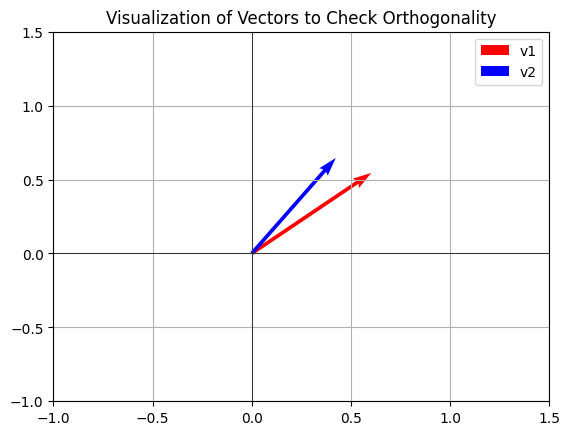

In [18]:
# Visualization of vectors to check orthogonality
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

plt.xlim(-1, 1.5)
plt.ylim(-1, 1.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Visualization of Vectors to Check Orthogonality')
plt.show()


###*1.2.3: Gram-Schmidt Process*

The Gram-Schmidt process is an algorithm for orthogonalizing a set of vectors in an inner product space. Given a set of linearly independent vectors, this process generates an orthogonal (or orthonormal) set of vectors that spans the same subspace.



In [19]:
# Applying the Gram-Schmidt Process to orthogonalize vectors

def gram_schmidt(vectors):
    """
    Perform the Gram-Schmidt Orthogonalization on a set of vectors.

    Parameters:
    vectors (numpy.ndarray): A 2D array where each row represents a vector.

    Returns:
    numpy.ndarray: A 2D array where each row represents an orthogonal vector.
    """
    orthogonal_vectors = []

    for v in vectors:
        orthogonal_vector = v.astype(float)  # Ensure calculations are in float
        for u in orthogonal_vectors:
            # Subtract the projection of v onto u
            orthogonal_vector -= np.dot(orthogonal_vector, u) / np.dot(u, u) * u
        orthogonal_vectors.append(orthogonal_vector)

    return np.array(orthogonal_vectors)

# Use two non-orthogonal vectors from the dataset
non_orthogonal_vectors = np.array([data_points[0], data_points[1]])

# Apply Gram-Schmidt to orthogonalize them
orthogonal_vectors = gram_schmidt(non_orthogonal_vectors)

print("Non-Orthogonal Vectors:\n", non_orthogonal_vectors)
print("Orthogonalized Vectors:\n", orthogonal_vectors)


Non-Orthogonal Vectors:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]]
Orthogonalized Vectors:
 [[ 0.5488135   0.71518937]
 [ 0.11620793 -0.08917425]]


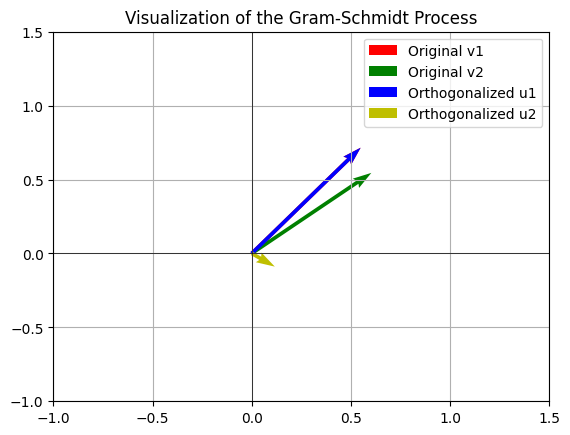

In [20]:
# Visualization of Gram-Schmidt process
plt.quiver(0, 0, non_orthogonal_vectors[0, 0], non_orthogonal_vectors[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='Original v1')
plt.quiver(0, 0, non_orthogonal_vectors[1, 0], non_orthogonal_vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Original v2')
plt.quiver(0, 0, orthogonal_vectors[0, 0], orthogonal_vectors[0, 1], angles='xy', scale_units='xy', scale=1, color='b', label='Orthogonalized u1')
plt.quiver(0, 0, orthogonal_vectors[1, 0], orthogonal_vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='y', label='Orthogonalized u2')

plt.xlim(-1, 1.5)
plt.ylim(-1, 1.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Visualization of the Gram-Schmidt Process')
plt.show()


###*1.2.4: Eigenvalues and Eigenvectors*

For a square matrix 𝐴, an eigenvector is a non-zero vector 𝑣 that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue is the factor by which the eigenvector is scaled.

In [21]:
# Define a square matrix
A = np.array([[4, 2], [1, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")


Eigenvalues: [5. 2.]
Eigenvectors:
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [23]:
#Computing Eigenvalues and Eigenvectors of the Covariance Matrix

# Compute the covariance matrix of the data points
cov_matrix = np.cov(data_points.T)
print("Covariance Matrix:\n", cov_matrix)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Covariance Matrix:
 [[0.09052507 0.00599988]
 [0.00599988 0.07038515]]
Eigenvalues:
 [0.092177   0.06873323]
Eigenvectors:
 [[ 0.96412478 -0.26544944]
 [ 0.26544944  0.96412478]]


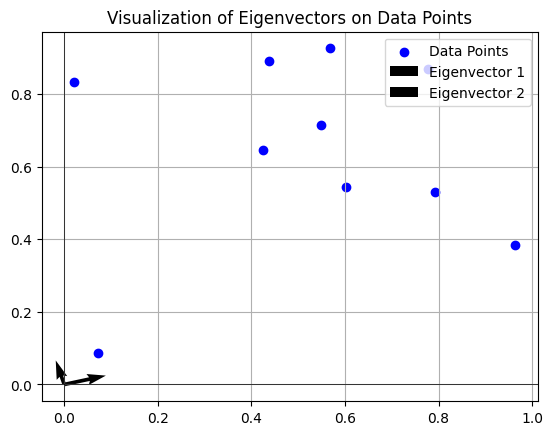

In [24]:
# Visualization of eigenvectors on top of data points
plt.scatter(data_points[:, 0], data_points[:, 1], color='blue', label='Data Points')

# Plot eigenvectors scaled by their eigenvalues
for i in range(len(eigenvalues)):
    plt.quiver(0, 0, eigenvectors[0, i] * eigenvalues[i], eigenvectors[1, i] * eigenvalues[i],
               angles='xy', scale_units='xy', scale=1, label=f'Eigenvector {i+1}')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Visualization of Eigenvectors on Data Points')
plt.show()
